<a href="https://colab.research.google.com/github/IMP802/5001/blob/main/5001_Graph3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Master_Degree/5001/combined_v2.csv')
df.head(3)

,month_no,hcode,hname,province_id,prov,nhso_zonename,gender,service_type,pdx,pdx_name,n_pop,n_service
0,202210,4007,รพ.ซับใหญ่,3600,ชัยภูมิ,เขต 9 นครราชสีมา,1.0,IP,R00,Abnormalities of heart beat,1,1
1,202210,4007,รพ.ซับใหญ่,3600,ชัยภูมิ,เขต 9 นครราชสีมา,1.0,IP,J44,Other chronic obstructive pulmonary disease,1,1
2,202210,4007,รพ.ซับใหญ่,3600,ชัยภูมิ,เขต 9 นครราชสีมา,1.0,IP,R56,Convulsions not elsewhere classified,1,1


In [3]:
#By Province By Disease
pd_c = 'R00'
prov_c = 'สระบุรี'
sub=df.loc[ (df['pdx'] == pd_c) & (df['prov'] == prov_c) , ['prov','gender','n_service','n_pop','pdx','month_no'] ]
sub.head(3)

,prov,gender,n_service,n_pop,pdx,month_no
623,สระบุรี,2.0,1,1,R00,202210
20192,สระบุรี,2.0,2,2,R00,202210
50244,สระบุรี,2.0,2,2,R00,202210


In [6]:
gf=sub[['prov','gender','n_service','n_pop','pdx','month_no']].groupby('month_no')
gf1=gf[['n_service','n_pop']].agg('sum')
gf1.reset_index(inplace=True)
#gf1

In [7]:
ax1=list(gf1.iloc[:,0])
ay1=list(gf1.iloc[:,2])

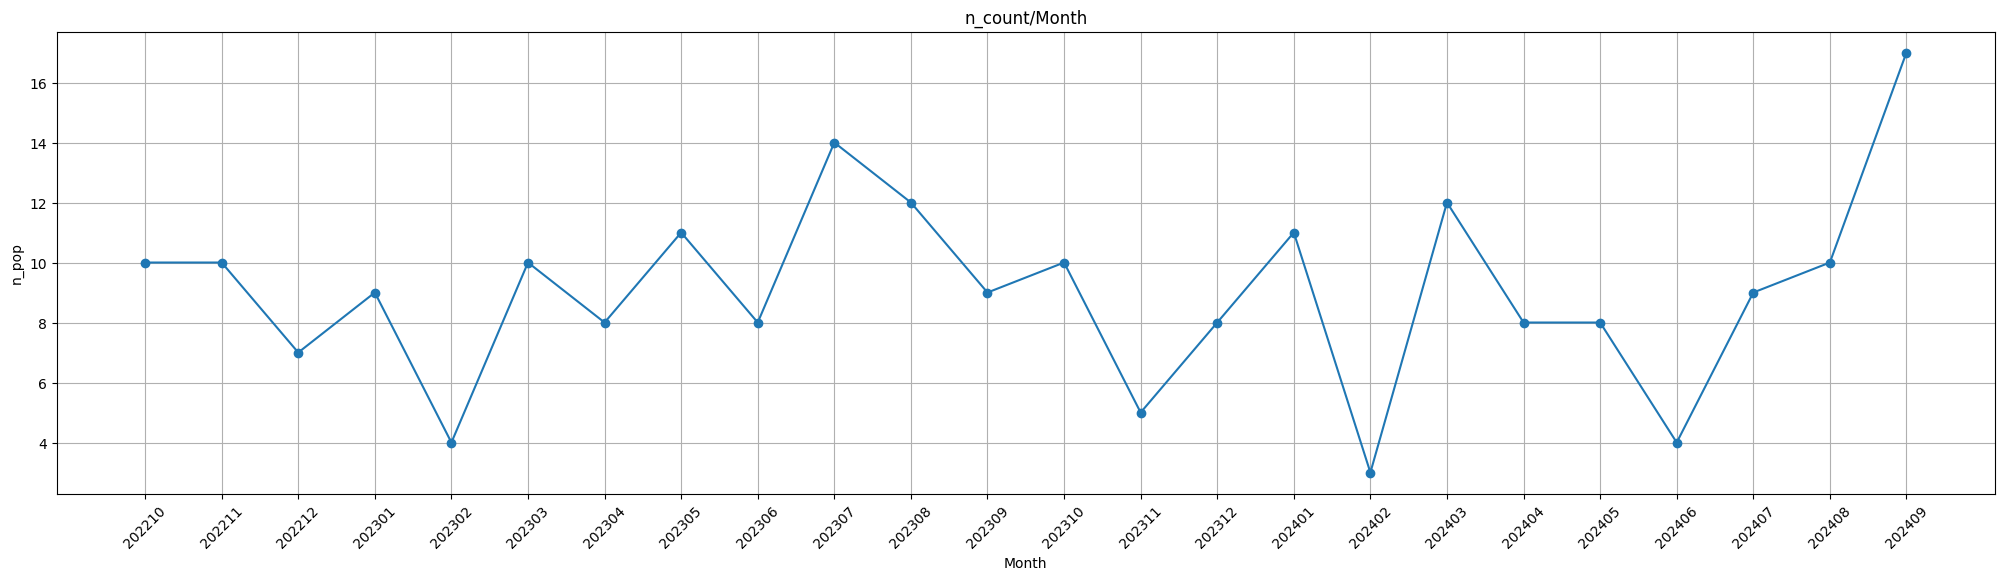

In [22]:

fig, ax = plt.subplots(figsize=(25, 6))

# Plot the data using numerical indices for x-axis
ax.plot(np.arange(len(ax1)), ay1, marker='o', linestyle='-')

# Set the x-tick locations to correspond to the indices
ax.set_xticks(np.arange(len(ax1)))
ax.set_xticklabels(ax1)


# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('n_pop')
ax.set_title('n_count/Month')

# Display the plot
plt.xticks(np.arange(len(ax1)), ax1, rotation=45)
plt.grid(True)
plt.show()